In [1]:
#Packages import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
%matplotlib inline


In [76]:
#File Imports 

magdata = pd.read_csv("magnetic_data.csv")
run1 = pd.read_csv("hall_run_1.csv")
run2 = pd.read_csv("hall_run_2.csv")
hall_mag_run_1 = pd.read_csv("hall_mag_run_1.csv") 

hall_mag_run_1.head()

,HV,T,I
0,-5.5,-0.0039,50
1,-8.9,-0.0078,100
2,-12.3,-0.0117,150
3,-15.8,-0.0157,200
4,-19.1,-0.0196,250


In [3]:
#Magnetic Data Manipulation 

T = magdata["T"]
T_m = np.round(np.mean(T), 4)  

T_sd = np.round(np.std(T), 4) 

print(T_m, "pm", T_sd ) 

-0.0378 pm 0.021


In [65]:
#Graph set ups 

def linearfit(x, m, c): #defining output 
    return m*x + c

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

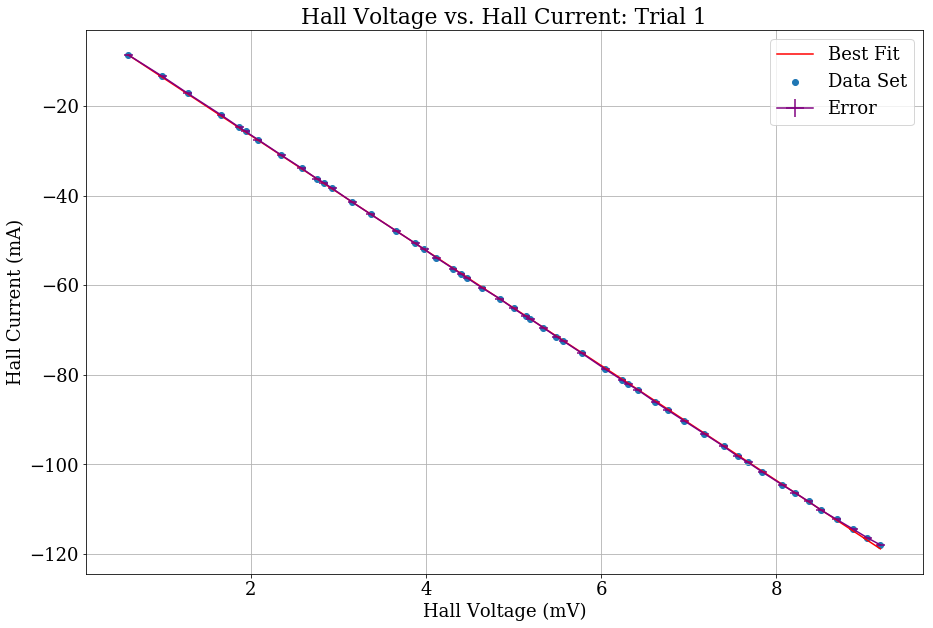

The slope of this graph is, -12.837124173436333
[-12.83712417  -0.90279303]


In [77]:
#Run 1 700 ma for Im 

x = run1["I"]
y = run1["V"]
yerr = 0.05 
xerr = 0.05


# ---------- Plotting the Graph ----------



pars, cov = curve_fit(linearfit, x, y)

plt.scatter(x, y, label = "Data Set")
plt.plot(x, linearfit(x, *pars), color = 'red', label = "Best Fit") 
plt.errorbar(x, y, yerr, xerr, 'purple', markersize=1, label = "Error")


plt.title("Hall Voltage vs. Hall Current: Trial 1")
plt.xlabel("Hall Voltage (mV)")
plt.ylabel("Hall Current (mA)")


plt.legend()
plt.grid()
plt.savefig('graphs/HI_HV_R1.png')
plt.show()

print("The slope of this graph is,", pars[0])

print(pars)
B_1 = pars[0] 

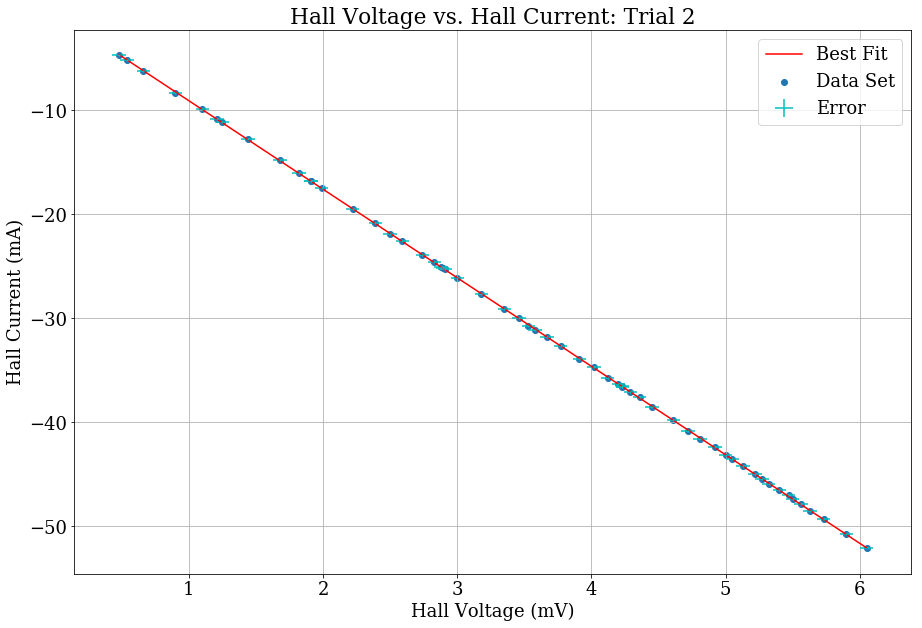

The slope of this graph is, [-8.50983675]


In [72]:
#Graphing Hall Current vs. Hall Voltage Run 1

x = run2["I"]
y = run2["V"]
yerr = 0.05 
xerr = 0.05


# ---------- Plotting the Graph ----------



pars, cov = curve_fit(linearfit, x, y)

plt.scatter(x, y, label = "Data Set")
plt.plot(x, linearfit(x, *pars), color = 'red', label = "Best Fit")
plt.errorbar(x, y, yerr, xerr, 'co', markersize=1, label = "Error")


plt.title("Hall Voltage vs. Hall Current: Trial 2")
plt.xlabel("Hall Voltage (mV)")
plt.ylabel("Hall Current (mA)")

plt.legend()
plt.grid()
plt.savefig('graphs/HI_HV_R2.png')
plt.show()

print("The slope of this graph is,", pars[:1])

B_2 = pars[0] 

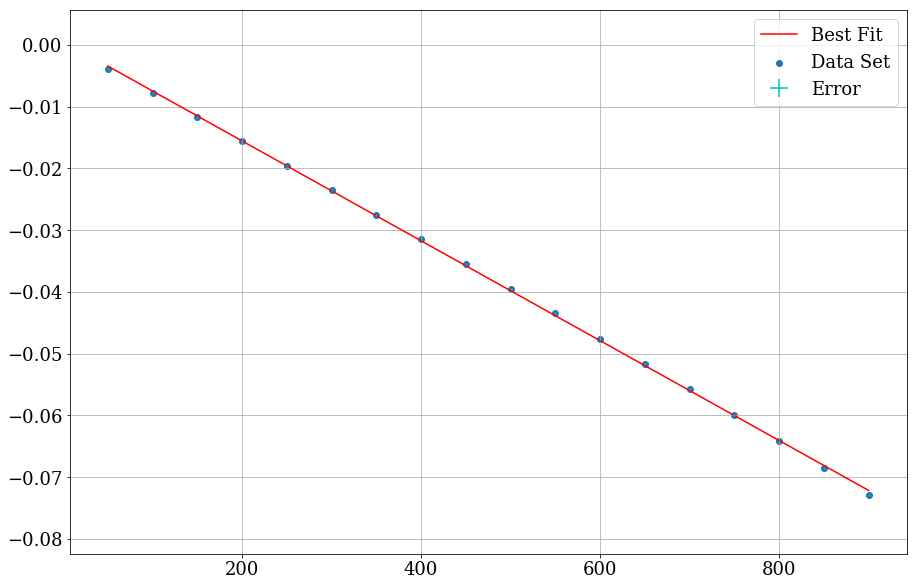

The slope of this graph is, [-8.08751286e-05]


In [83]:
#Magnetic Field Graph 

x = magdata["I"]
y = magdata["T"]
yerr = 0
xerr = 0


# ---------- Plotting the Graph ----------



pars, cov = curve_fit(linearfit, x, y)

plt.scatter(x, y, label = "Data Set")
plt.plot(x, linearfit(x, *pars), color = 'red', label = "Best Fit")
plt.errorbar(x, y, yerr, xerr, 'co', markersize=1, label = "Error")

# plt.title("Fixed Current: Trial 1")
# # plt.xlabel("Hall Voltage (mV)")
# plt.ylabel("Hall Current (mA)")

plt.legend()
plt.grid()
plt.savefig('graphs/mag_field_strength.png')
plt.show()

print("The slope of this graph is,", pars[:1])


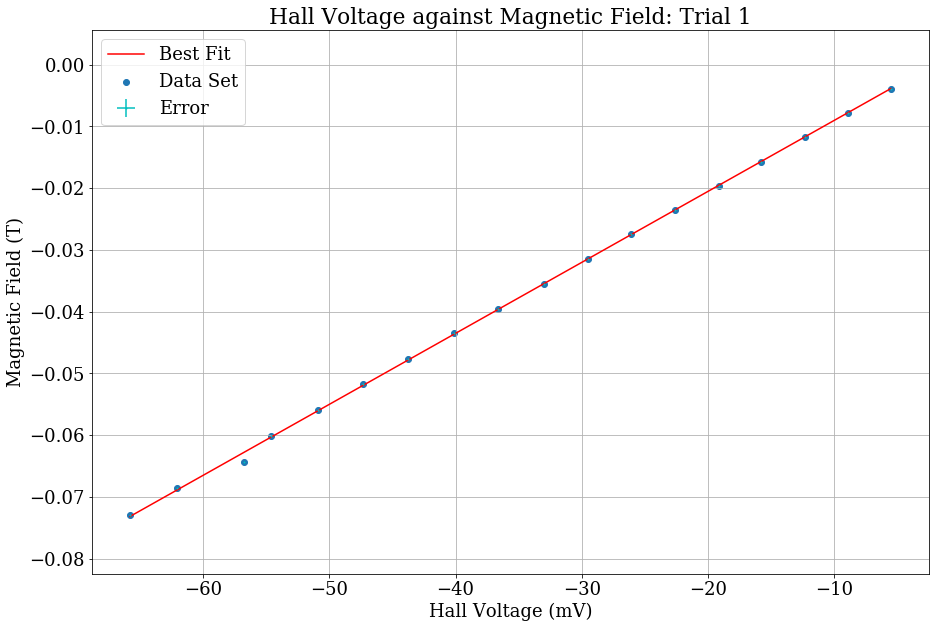

The slope of this graph is, 0.0011492736459282425


In [89]:
# ----- Hall Voltage against Magnetic Field: Run 1 ----- 

x = hall_mag_run_1["HV"]
y = hall_mag_run_1["T"]
yerr = 0
xerr = 0


# ---------- Plotting the Graph ----------



pars, cov = curve_fit(linearfit, x, y)

plt.scatter(x, y, label = "Data Set")
plt.plot(x, linearfit(x, *pars), color = 'red', label = "Best Fit")
plt.errorbar(x, y, yerr, xerr, 'co', markersize=1, label = "Error")

plt.title("Hall Voltage against Magnetic Field: Trial 1")
plt.xlabel("Hall Voltage (mV)")
plt.ylabel("Magnetic Field (T)")

plt.legend()
plt.grid()
plt.savefig('graphs/HV_MF_R1.png')
plt.show()

print("The slope of this graph is,", pars[0])

M_1 = pars[0]

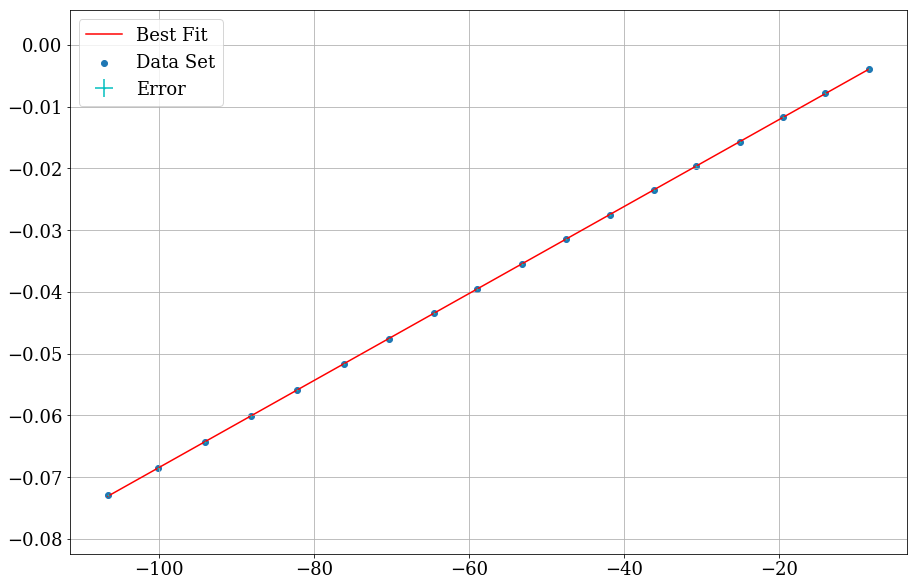

The slope of this graph is, [0.00070482]


In [9]:
# ----- Hall Voltage against Magnetic Field: Run 2----- 

hall_mag_run_2 = pd.read_csv("hall_mag_run_2.csv")

x = hall_mag_run_2["HV"]
y = hall_mag_run_2["T"]
yerr = 0
xerr = 0


# ---------- Plotting the Graph ----------



pars, cov = curve_fit(linearfit, x, y)

plt.scatter(x, y, label = "Data Set")
plt.plot(x, linearfit(x, *pars), color = 'red', label = "Best Fit")
plt.errorbar(x, y, yerr, xerr, 'co', markersize=1, label = "Error")

plt.legend()
plt.grid()
plt.savefig('graphs/HV_MF_R2.png')
plt.show()

print("The slope of this graph is,", pars[:1])







In [98]:
#constant definitions, from lab manual 

width = 1.2e-3 #meters 
height = 2.3e-3
length = 3.9e-3
e = 1.602e-19 #Coulomb
 #Slope 

#--- Calculations Part 3.1 --- 

n_q = (T_m/(e*width*B_1))

print("Charge Density from Run 1 = ", n_q)\

n_q2 = (T_m/(e*width*B_2))

print("Charge Density from Run 2 = ", n_q2)

print("Average Charge Density =", (n_q + n_q2)/2)

#---- Hall Constants ---- 

RH1 = 1/(n_q*e)
RH2 = 1/(n_q2*e)

print("Hall constants from trial 1 and 2 respectivly", RH1, RH2) #meters cubed per Coulomb 

#--- Calculations Part 3.2: Fixed Current Run 1--- 

I_1 = 0.0025

n_q3 = (I_1/(e*width*M_1*100))

print("Charge Density from Run 1 (Magnetic) = ", n_q3)




#----- Error Anaylsis ------

def error(a ,b, c):
    return (a**2)*((b/c)**2) 
    

Charge Density from Run 1 =  1.531723233541886e+19
Charge Density from Run 2 =  2.3106108767267123e+19
Average Charge Density = 1.921167055134299e+19
Hall constants from trial 1 and 2 respectivly 0.4075277515376613 0.27015354754479953
Charge Density from Run 1 (Magnetic) =  1.131547535035982e+20
